<a href="https://colab.research.google.com/github/darkwingpatil/Ml_hackethons/blob/main/Transfer_learning_class_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

To identify and classify different types of weather using any open-source pre-trained models.

## Learning Objectives

At the end of this, you will be able to :

* Load and prepare the dataset
* Strengthen skills in the Transfer Learning area

In [ ]:
#@title Mini-hackathon walkthrough
from IPython.display import HTML

HTML("""<video width="854" height="480" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/B18_U4_MH_Walkthrough.mp4" type="video/mp4">
</video>
""")

## Dataset

Multi-class weather dataset(MWD) for image classification is a valuable dataset contains 1125 images divided into four folders such as sunrise, shine, rain, and cloudy.

## Grading = 10 Marks

## Setup Steps

In [2]:
#@title Run this cell to download the dataset

from IPython import get_ipython
ipython = get_ipython()

notebook="U4_MH1_Multi-class weather_Transfer_learning" #name of the notebook
Answer = "This notebook is graded by mentors on the day of hackathon"
def setup():
#
   ipython.magic("sx wget http://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Multi-classWeatherDataset.zip")
   ipython.magic("sx unzip -qq Multi-classWeatherDataset.zip")
   print ("Setup completed successfully")
   return

setup()

Setup completed successfully


## Basic Pytorch packages

**torchvision:**  This package is used to load and prepare the dataset. Using this package we can perform/apply transformations on the input data.

**transforms:**  This package is  used to perform preprocessing on images and operations sequentially.

**nn:**  This package provides an easy and modular way to build and train simple or complex neural networks.

**optim:** This package is used for  implementing various optimization algorithms

In [1]:
# Import Libraries
import torch
import torchvision
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchsummary import summary
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

## **Stage 1 :** Data Preparation

2 Marks -> Load the data and Split the data into Train and Test sets

1. Define the transformations
2. Prepare the dataset with the defined transformations
3. Split the data into train and test sets
4. Load the train and test data using dataloader

In [4]:
# YOUR CODE HERE for preparing and loading the data
from sklearn.model_selection import train_test_split

transformation = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float)
])


data_set = datasets.ImageFolder('./Multi-class Weather Dataset', transform = transformation)

# YOUR CODE HERE for the DataLoader
data_loader = torch.utils.data.DataLoader(data_set,shuffle=True,batch_size=100)

train_split = int(0.75 * (len(data_set)))
test_split= len(data_set) - train_split

train_dataset, test_dataset = random_split(data_set,[train_split,test_split])

train_loader = DataLoader(train_dataset,batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [9]:
for batch in train_loader:
    inputs, labels = batch
    print(inputs.shape)
    images= inputs.numpy()
    print(np.squeeze(images[0]).shape)

    break

torch.Size([32, 3, 128, 128])
(3, 128, 128)


1 Marks -> Plot the first 10 images

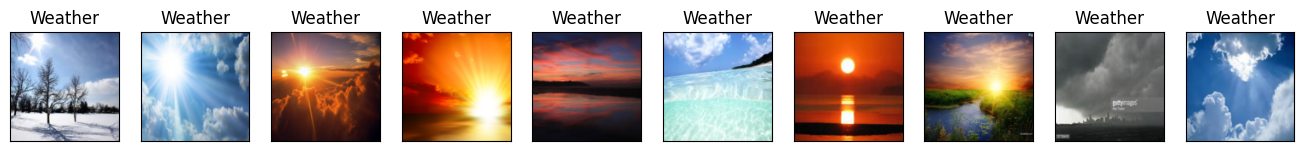

In [6]:
# YOUR CODE HERE for plotting the images rbg images
import numpy as np
for batch in train_loader:
    inputs, labels = batch
    images= inputs.numpy()

    fig= plt.figure(figsize=(25,4))

    for idx in np.arange(10):
      ax = fig.add_subplot(2, int(30/2), idx+1, xticks=[], yticks=[])
      avg_image = np.transpose(images[idx], (1, 2, 0))
      ax.imshow(np.squeeze(avg_image), cmap='gray')
      ax.set_title('Weather')

    break

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## **Stage2:** Build the Model

2 Marks -> Prepare the Model using any open-source pretrained model

1. Download a pre-trained model.
2. Fine tune or customize layers in the output to perform classification on a specific task.
3. Declare the loss function and optimizer
4. Print the summary of the model.

In [8]:
def model_selection(model_name=None):
    # Initialize model_ft
    model_ft = None

    if model_name == 'vggnet':
        model_ft = models.vgg16(pretrained=True)

        for param in model_ft.parameters():
            param.requires_grad = False

        num_filters = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_filters, 4)

    else:
        model_ft = models.resnet18(pretrained=True)

        for param in model_ft.parameters():
            param.requires_grad = False

        num_filters = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_filters, 4)

    return model_ft

In [17]:
from torchsummary import summary

model=model_selection()
model=model.to(device)
#[32, 3, 128, 128]

summary(model,input_size=(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           9,408
       BatchNorm2d-2           [-1, 64, 64, 64]             128
              ReLU-3           [-1, 64, 64, 64]               0
         MaxPool2d-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
       BasicBlock-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
             ReLU-14           [-1, 64,

In [18]:
model_res=model_selection()
model_res= model_res.to(device)
model_vgg = model_selection('vggnet')
model_vgg = model_vgg.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
 

In [19]:
criterian = nn.CrossEntropyLoss()

optimizer_resnet = optim.Adam(model_res.parameters(), lr=0.001)
optimizer_vggnet = optim.Adam(model_vgg.parameters(),lr=0.001)

exp_lr_scheduler_res = optim.lr_scheduler.StepLR(optimizer_resnet, step_size=7, gamma=0.1)
exp_lr_scheduler_vgg = optim.lr_scheduler.StepLR(optimizer_vggnet, step_size=7, gamma=0.1)

## **Stage 3:** Train the Model

2 Marks -> Train the Model and validate it continuously to calculate the loss and accuracy for the train dataset across each epoch.

**Expected training accuracy is above 95%**

In [20]:
import copy
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        model.train()
        correct = 0
        iter_loss = 0.0
        train_loss, train_accuracy = [], []

        # Each epoch has a training and validation phase

            # Iterate over data
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # Forward
            # Track history if only in train
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            correct += (preds == labels).sum().item()

        train_loss.append(iter_loss/len(train_dataset))
        # Calculate the accuracy
        train_accuracy.append((100 * correct / len(train_dataset)))
        print ('Epoch {}/{}, Training Accuracy: {:.3f}'.format(epoch+1, num_epochs, train_accuracy[-1]))


        # epoch_loss = running_loss / dataset_sizes[phase]
        # epoch_acc = running_corrects.double() / dataset_sizes[phase]

        # print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

        # # Deep copy the model
        # if phase == 'val' and epoch_acc > best_acc:
        #     best_acc = epoch_acc
        #     best_model_wts = copy.deepcopy(model.state_dict())

    # print()

    # time_elapsed = time.time() - since
    # print('Training complete in {:.0f}m {:.0f}s'.format(
    #     time_elapsed // 60, time_elapsed % 60))
    # print('Best val Acc: {:4f}'.format(best_acc))
    # train_loss.append(iter_loss/len(train_dataset))
    # # Calculate the accuracy
    # train_accuracy.append((100 * correct / len(train_dataset)))
    # print ('Epoch {}/{}, Training Accuracy: {:.3f}'.format(epoch+1, num_epochs, train_accuracy[-1]))


    # # Load best model weights
    # model.load_state_dict(best_model_wts)
    return model

In [22]:
train_model(model_res, criterian, optimizer_resnet, exp_lr_scheduler_res, num_epochs=10)

Epoch 0/9
----------
Epoch 1/10, Training Accuracy: 80.308
Epoch 1/9
----------
Epoch 2/10, Training Accuracy: 88.138
Epoch 2/9
----------
Epoch 3/10, Training Accuracy: 91.340
Epoch 3/9
----------
Epoch 4/10, Training Accuracy: 93.001
Epoch 4/9
----------
Epoch 5/10, Training Accuracy: 95.018
Epoch 5/9
----------
Epoch 6/10, Training Accuracy: 92.171
Epoch 6/9
----------
Epoch 7/10, Training Accuracy: 94.187
Epoch 7/9
----------
Epoch 8/10, Training Accuracy: 94.662
Epoch 8/9
----------
Epoch 9/10, Training Accuracy: 95.136
Epoch 9/9
----------
Epoch 10/10, Training Accuracy: 95.492


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
train_model(model_vgg, criterian, optimizer_vggnet, exp_lr_scheduler_res, num_epochs=10)

Epoch 0/9
----------
Epoch 1/10, Training Accuracy: 73.784
Epoch 1/9
----------
Epoch 2/10, Training Accuracy: 89.442
Epoch 2/9
----------
Epoch 3/10, Training Accuracy: 90.866
Epoch 3/9
----------
Epoch 4/10, Training Accuracy: 92.883
Epoch 4/9
----------
Epoch 5/10, Training Accuracy: 93.357
Epoch 5/9
----------
Epoch 6/10, Training Accuracy: 93.001
Epoch 6/9
----------
Epoch 7/10, Training Accuracy: 94.069
Epoch 7/9
----------
Epoch 8/10, Training Accuracy: 95.136
Epoch 8/9
----------
Epoch 9/10, Training Accuracy: 94.425
Epoch 9/9
----------
Epoch 10/10, Training Accuracy: 95.374


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## **Stage 4:** Evaluate the Model

2 Marks -> Evaluate the model for the test dataset and calculate the loss and accuracy.

**Expected performance of test evaluation is above 95%**

In [25]:
# model.eval()
# YOUR CODE HERE for calculating the accuracy
def test_model(model):
  model.eval()

  Test_accuracy = 0

  # Iterate through all the batches in each epoch
  for images,labels in test_loader:

      # Convert the images and labels to gpu for faster execution
      images = images.to(device)
      labels = labels.to(device)

      outputs = model(images)

      # Accuracy calculation
      _, predicted = torch.max(outputs, 1)
      Test_accuracy += (predicted == labels).sum().item()

  Accuracy = 100 * Test_accuracy / len(test_dataset)
  print("Accuracy of Test Data is", Accuracy)

In [26]:
test_model(model_res)

Accuracy of Test Data is 93.61702127659575


In [27]:
test_model(model_vgg)

Accuracy of Test Data is 93.26241134751773


## **Stage 5:** Report your observations on any two open source pre-trained models

1 Marks -> Report your observations

In [ ]:
# YOUR TEXT HERE on your observations